<a href="https://colab.research.google.com/github/YatindraRai002/CV-Model/blob/main/CV_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [10]:

torch.manual_seed(42)
np.random.seed(42)

print("🚀 Computer Vision Project: CIFAR-10 Image Classification")
print("=" * 60)

🚀 Computer Vision Project: CIFAR-10 Image Classification


In [17]:
class DatasetExplorer:
    def __init__(self):
        self.classes = ('plane', 'car', 'bird', 'cat', 'deer',
                       'dog', 'frog', 'horse', 'ship', 'truck')

    def load_data(self):
        """Load and preprocess CIFAR-10 dataset"""
        print("\n📊 Loading CIFAR-10 Dataset...")

        # Data preprocessing and augmentation
        transform_train = transforms.Compose([
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
        ])

        transform_test = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
        ])

        # Download and load datasets
        trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                              download=True, transform=transform_train)

        testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                             download=True, transform=transform_test)

        # Create data loaders
        trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
        testloader = DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

        print(f"✅ Training samples: {len(trainset)}")
        print(f"✅ Test samples: {len(testset)}")
        print(f"✅ Classes: {self.classes}")

        return trainloader, testloader, trainset, testset

    def visualize_samples(self, dataset):
        """Visualize sample images from each class"""
        print("\n🖼️ Visualizing Dataset Samples...")

        fig, axes = plt.subplots(2, 5, figsize=(12, 6))
        fig.suptitle('CIFAR-10 Dataset - Sample Images', fontsize=16)

        # Get one sample from each class
        class_samples = {}
        for img, label in dataset:
            if label not in class_samples:
                class_samples[label] = img
            if len(class_samples) == 10:
                break

        for idx, (label, img) in enumerate(class_samples.items()):
            row, col = idx // 5, idx % 5

            # Denormalize for visualization
            img = img * torch.tensor([0.2023, 0.1994, 0.2010]).view(3, 1, 1) + \
                  torch.tensor([0.4914, 0.4822, 0.4465]).view(3, 1, 1)
            img = torch.clamp(img, 0, 1)

            axes[row, col].imshow(np.transpose(img, (1, 2, 0)))
            axes[row, col].set_title(f'{self.classes[label]}', fontsize=12)
            axes[row, col].axis('off')

        plt.tight_layout()
        plt.show()

In [12]:
 def visualize_samples(self, dataset):
        """Visualize sample images from each class"""
        print("\n🖼️ Visualizing Dataset Samples...")

        fig, axes = plt.subplots(2, 5, figsize=(12, 6))
        fig.suptitle('CIFAR-10 Dataset - Sample Images', fontsize=16)

        # Get one sample from each class
        class_samples = {}
        for img, label in dataset:
            if label not in class_samples:
                class_samples[label] = img
            if len(class_samples) == 10:
                break

        for idx, (label, img) in enumerate(class_samples.items()):
            row, col = idx // 5, idx % 5

            # Denormalize for visualization
            img = img * torch.tensor([0.2023, 0.1994, 0.2010]).view(3, 1, 1) + \
                  torch.tensor([0.4914, 0.4822, 0.4465]).view(3, 1, 1)
            img = torch.clamp(img, 0, 1)

            axes[row, col].imshow(np.transpose(img, (1, 2, 0)))
            axes[row, col].set_title(f'{self.classes[label]}', fontsize=12)
            axes[row, col].axis('off')

        plt.tight_layout()
        plt.show()

In [13]:
class AdvancedCNN(nn.Module):
    """Advanced CNN architecture for CIFAR-10 classification"""

    def __init__(self, num_classes=10):
        super(AdvancedCNN, self).__init__()

        # Convolutional layers with batch normalization
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)

        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(256)

        # Pooling and dropout
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        # Block 1
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)  # 32x32 -> 16x16

        # Block 2
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)  # 16x16 -> 8x8

        # Block 3
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))
        x = self.pool(x)  # 8x8 -> 4x4

        # Flatten and fully connected
        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x

In [14]:
class ModelTrainer:
    def __init__(self, model, device):
        self.model = model.to(device)
        self.device = device
        self.train_losses = []
        self.train_accuracies = []

    def train_epoch(self, trainloader, criterion, optimizer):
        """Train for one epoch"""
        self.model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (inputs, targets) in enumerate(trainloader):
            inputs, targets = inputs.to(self.device), targets.to(self.device)

            optimizer.zero_grad()
            outputs = self.model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

            if batch_idx % 100 == 99:
                print(f'Batch {batch_idx+1}, Loss: {running_loss/100:.3f}, '
                      f'Acc: {100.*correct/total:.2f}%')
                running_loss = 0.0

        epoch_acc = 100. * correct / total
        return epoch_acc

    def evaluate(self, testloader, criterion):
        """Evaluate model on test set"""
        self.model.eval()
        test_loss = 0
        correct = 0
        total = 0
        all_predictions = []
        all_targets = []

        with torch.no_grad():
            for inputs, targets in testloader:
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = self.model(inputs)
                loss = criterion(outputs, targets)

                test_loss += loss.item()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

                all_predictions.extend(predicted.cpu().numpy())
                all_targets.extend(targets.cpu().numpy())

        accuracy = 100. * correct / total
        avg_loss = test_loss / len(testloader)

        return accuracy, avg_loss, all_predictions, all_targets

    def train_model(self, trainloader, testloader, epochs=20, lr=0.001):
        """Complete training pipeline"""
        print(f"\n🏋️ Training Model for {epochs} epochs...")

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model.parameters(), lr=lr, weight_decay=1e-4)
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

        best_acc = 0
        train_accuracies = []
        test_accuracies = []

        for epoch in range(epochs):
            print(f'\n--- Epoch {epoch+1}/{epochs} ---')
            start_time = time.time()

            # Training
            train_acc = self.train_epoch(trainloader, criterion, optimizer)

            # Evaluation
            test_acc, test_loss, _, _ = self.evaluate(testloader, criterion)

            # Learning rate scheduling
            scheduler.step()

            # Record metrics
            train_accuracies.append(train_acc)
            test_accuracies.append(test_acc)

            # Save best model
            if test_acc > best_acc:
                best_acc = test_acc
                torch.save(self.model.state_dict(), 'best_model.pth')
                print(f'✅ New best model saved! Accuracy: {best_acc:.2f}%')

            epoch_time = time.time() - start_time
            print(f'Epoch {epoch+1} completed in {epoch_time:.2f}s')
            print(f'Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%')

        return train_accuracies, test_accuracies, best_acc

In [15]:
class ResultsAnalyzer:
    def __init__(self, classes):
        self.classes = classes

    def plot_training_curves(self, train_acc, test_acc):
        """Plot training and validation curves"""
        print("\n📈 Plotting Training Curves...")

        plt.figure(figsize=(10, 6))
        epochs = range(1, len(train_acc) + 1)

        plt.plot(epochs, train_acc, 'b-', label='Training Accuracy', linewidth=2)
        plt.plot(epochs, test_acc, 'r-', label='Test Accuracy', linewidth=2)

        plt.title('Model Accuracy Over Time', fontsize=16)
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel('Accuracy (%)', fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    def plot_confusion_matrix(self, true_labels, predictions):
        """Plot confusion matrix"""
        print("\n🎯 Generating Confusion Matrix...")

        cm = confusion_matrix(true_labels, predictions)

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.classes, yticklabels=self.classes)
        plt.title('Confusion Matrix - CIFAR-10 Classification', fontsize=16)
        plt.xlabel('Predicted Label', fontsize=12)
        plt.ylabel('True Label', fontsize=12)
        plt.tight_layout()
        plt.show()

    def generate_classification_report(self, true_labels, predictions):
        """Generate detailed classification report"""
        print("\n📊 Classification Report:")
        print("=" * 60)

        report = classification_report(true_labels, predictions,
                                     target_names=self.classes,
                                     digits=4)
        print(report)

    def test_sample_predictions(self, model, testloader, device, num_samples=8):
        """Show sample predictions"""
        print(f"\n🔍 Sample Predictions (Random {num_samples} images):")

        model.eval()

        # Get a batch of test data
        dataiter = iter(testloader)
        images, labels = next(dataiter)

        # Select random samples
        indices = np.random.choice(len(images), num_samples, replace=False)
        sample_images = images[indices]
        sample_labels = labels[indices]

        # Make predictions
        with torch.no_grad():
            outputs = model(sample_images.to(device))
            _, predicted = torch.max(outputs, 1)

        # Visualize results
        fig, axes = plt.subplots(2, 4, figsize=(12, 6))
        fig.suptitle('Sample Predictions vs True Labels', fontsize=16)

        for idx in range(num_samples):
            row, col = idx // 4, idx % 4

            # Denormalize image
            img = sample_images[idx]
            img = img * torch.tensor([0.2023, 0.1994, 0.2010]).view(3, 1, 1) + \
                  torch.tensor([0.4914, 0.4822, 0.4465]).view(3, 1, 1)
            img = torch.clamp(img, 0, 1)

            axes[row, col].imshow(np.transpose(img, (1, 2, 0)))

            true_label = self.classes[sample_labels[idx]]
            pred_label = self.classes[predicted[idx]]

            color = 'green' if true_label == pred_label else 'red'
            title = f'True: {true_label}\nPred: {pred_label}'

            axes[row, col].set_title(title, fontsize=10, color=color)
            axes[row, col].axis('off')

        plt.tight_layout()
        plt.show()

🎬 Starting Computer Vision Project Pipeline...
💻 Using device: cpu

📊 Loading CIFAR-10 Dataset...
✅ Training samples: 50000
✅ Test samples: 10000
✅ Classes: ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

🖼️ Visualizing Dataset Samples...


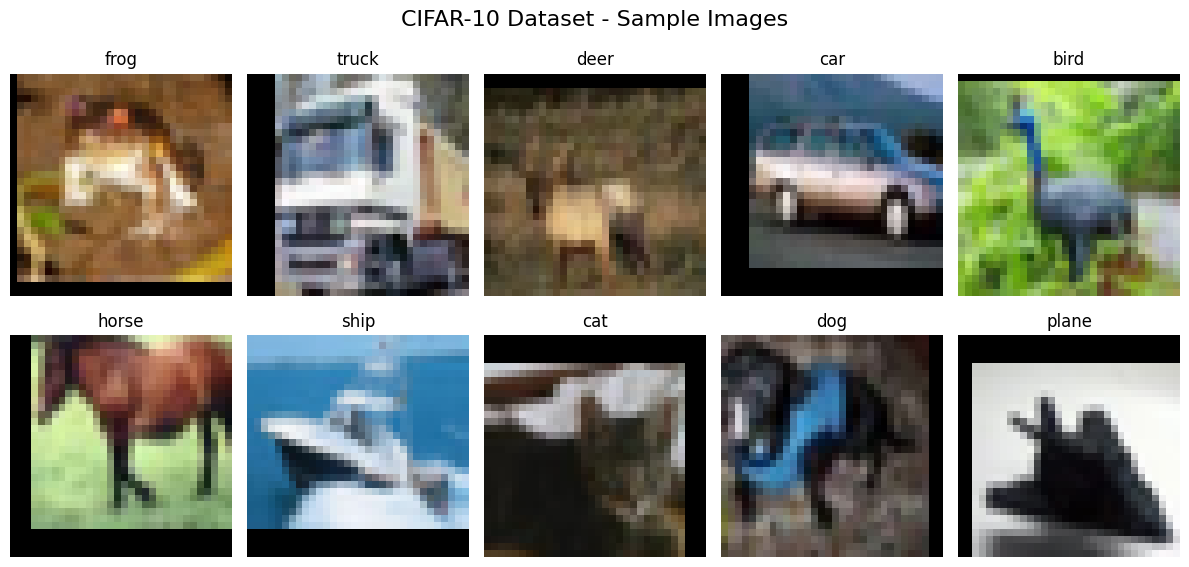


🏗️ Creating Advanced CNN Model...
✅ Model created successfully!
   • Total parameters: 3,378,762
   • Trainable parameters: 3,378,762

🏋️ Training Model for 15 epochs...

--- Epoch 1/15 ---


In [ ]:




# Step 5: Main Execution Pipeline
def main():
    """Main execution function"""
    print("🎬 Starting Computer Vision Project Pipeline...")

    # Check device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"💻 Using device: {device}")

    # Step 1: Data Loading and Exploration
    explorer = DatasetExplorer()
    trainloader, testloader, trainset, testset = explorer.load_data()
    explorer.visualize_samples(trainset)

    # Step 2: Model Creation
    print("\n🏗️ Creating Advanced CNN Model...")
    model = AdvancedCNN(num_classes=10)

    # Model summary
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"✅ Model created successfully!")
    print(f"   • Total parameters: {total_params:,}")
    print(f"   • Trainable parameters: {trainable_params:,}")

    # Step 3: Training
    trainer = ModelTrainer(model, device)
    train_acc, test_acc, best_acc = trainer.train_model(trainloader, testloader,
                                                       epochs=15, lr=0.001)

    # Step 4: Final Evaluation and Analysis
    print(f"\n🎉 Training Complete! Best Accuracy: {best_acc:.2f}%")

    # Load best model for final evaluation
    model.load_state_dict(torch.load('best_model.pth'))
    final_acc, final_loss, predictions, true_labels = trainer.evaluate(testloader,
                                                                       nn.CrossEntropyLoss())

    # Results Analysis
    analyzer = ResultsAnalyzer(explorer.classes)
    analyzer.plot_training_curves(train_acc, test_acc)
    analyzer.plot_confusion_matrix(true_labels, predictions)
    analyzer.generate_classification_report(true_labels, predictions)
    analyzer.test_sample_predictions(model, testloader, device)

    # Final Summary
    print("\n" + "="*60)
    print("🏆 PROJECT SUMMARY")
    print("="*60)
    print(f"Dataset: CIFAR-10 (50,000 train + 10,000 test images)")
    print(f"Model: Advanced CNN with {trainable_params:,} parameters")
    print(f"Final Test Accuracy: {final_acc:.2f}%")
    print(f"Training completed successfully!")
    print("="*60)

    return model, final_acc

# Uncomment to run the complete pipeline
if __name__ == "__main__":
    # Run the main pipeline
    model, accuracy = main()

    print("\n✅ Project completed successfully!")
    print("📁 Files saved: best_model.pth")
    print("🎯 Ready for submission!")